# EDA extensive exploratory data analysis

In [576]:
#head packages import
import gc
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

pd.set_option('display.max_columns' ,30) #setting as None for all row and cols
pd.set_option('display.max_rows' , 10)

train_x = np.load("Training data/X_train.npy")
train_y = np.load("Training data/y_train.npy")
test_x  = np.load("Testing data/X_test.npy")

1. 数据总览

In [577]:
train_x = pd.DataFrame(train_x).rename(columns={i: f"x_{i}" for i in range(111)})
train_y = pd.DataFrame(train_y).rename(columns={i: f"y_{i}" for i in range(11)})


test_x = pd.DataFrame(test_x).rename(columns={i: f"x_{i}" for i in range(111)})
pd.concat([train_x.head(), train_x.tail()])

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,...,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110
0,57.0,5.0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,1.0,3.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,71.0,2.0,2.0,NaN,NaN,2.0,NaN,3.0,0.0,7.0,4.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,NaN,NaN,5.0,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,1.0
2,64.0,2.0,0.0,NaN,NaN,2.0,NaN,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,7.0,2.0,4.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
3,74.0,1.0,1.0,6.0,2.0,2.0,NaN,2.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,74.0,2.0,0.0,6.0,2.0,0.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,8.0,0.0,6.0,0.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
995,86.0,4.0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,91.0,3.0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,3.0,NaN,5.0,0.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,0.0
997,46.0,4.0,0.0,0.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,2.0,5.0,0.0,1.0,5.0,1.0,1.0,1.0,1.0,0.0,0.0
998,70.0,2.0,1.0,2.0,2.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,5.0,2.0,4.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
999,60.0,2.0,0.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.0,5.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0


In [578]:
train_y

,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,1,1
4,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,0,1,0,0,0,0
996,0,0,0,0,1,0,1,0,0,1,1
997,0,1,0,1,1,0,0,1,1,0,1
998,0,1,0,1,1,0,0,0,0,0,0


In [579]:
train_x.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,...,x_96,x_97,x_98,x_99,x_100,x_101,x_102,x_103,x_104,x_105,x_106,x_107,x_108,x_109,x_110
count,995.000000,1000.000000,998.000000,933.000000,954.000000,966.000000,37.0,995.000000,996.000000,847.000000,966.000000,984.000000,984.0,984.000000,984.000000,...,618.000000,997.000000,997.000000,932.000000,918.000000,993.000000,931.000000,919.000000,995.000000,996.000000,995.000000,992.000000,992.000000,993.000000,993.000000
mean,65.179899,3.657000,0.444890,2.260450,1.190776,1.083851,0.0,1.413065,0.026104,3.341204,0.166667,0.006098,0.0,0.006098,0.013211,...,0.231392,0.066199,0.396189,3.084764,3.037037,3.290030,0.068743,2.968444,3.290452,0.072289,0.407035,0.428427,0.444556,0.011078,0.125881
std,11.492400,1.825564,0.816375,2.479035,1.053291,0.872260,0.0,1.083640,0.159526,3.121343,0.634228,0.077888,0.0,0.077888,0.114237,...,0.422064,0.248754,0.777769,1.782570,1.702760,1.827344,0.364560,1.758293,1.872994,0.259096,0.491529,0.495100,0.497167,0.104718,0.331883
min,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,3.000000,0.000000,1.000000,2.000000,1.000000,0.0,2.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,5.000000,1.000000,5.000000,2.000000,2.000000,0.0,2.000000,0.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000,0.000000,4.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,97.000000,13.000000,3.000000,6.000000,4.000000,2.000000,0.0,3.000000,1.000000,7.000000,4.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,4.000000,10.000000,11.000000,10.000000,3.000000,9.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [580]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 111 entries, x_0 to x_110
dtypes: float64(111)
memory usage: 867.3 KB


2. 查看数据缺失和异常

In [581]:
cols = [f"x_{i}" for i in range(111)]
data = pd.concat([train_x, test_x])

tmp = pd.DataFrame()
tmp['count'] = data[cols].count().values
tmp['missing_rate'] = (data.shape[0] - tmp['count']) / data.shape[0]
tmp['nunique'] = data[cols].nunique().values
tmp.index = cols
tmp
#每一维的类别个数, 缺失率, 异常值

,count,missing_rate,nunique
x_0,1692,0.004706,65
x_1,1700,0.000000,12
x_2,1696,0.002353,4
x_3,1594,0.062353,7
x_4,1627,0.042941,4
...,...,...,...
x_106,1687,0.007647,2
x_107,1683,0.010000,2
x_108,1683,0.010000,2
x_109,1684,0.009412,2


a:\16_Environments\2_Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='x_1'>

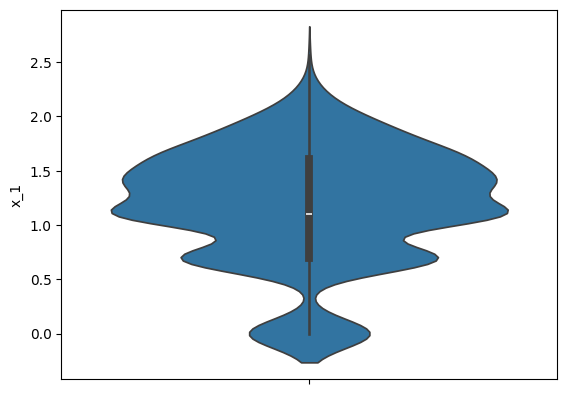

In [582]:
sns.violinplot(np.log(train_x["x_1"]))

3. 查看预测值的分布

a:\16_Environments\2_Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


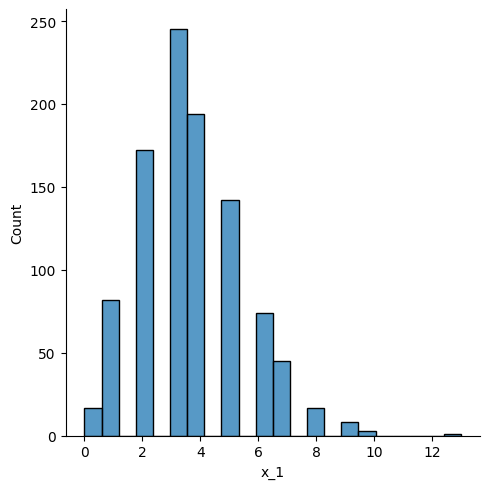

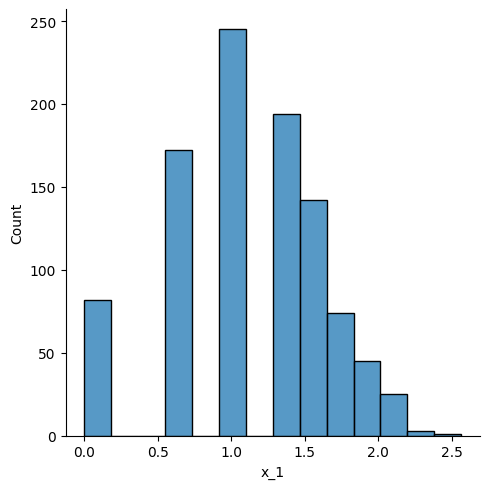

In [583]:
sns.displot(train_x["x_1"])
sns.displot(np.log(train_x["x_1"]))

4. 数值型特征分析

In [584]:
pd.set_option('display.max_rows' , 10)
# 查看偏度和峰度
tmp = pd.DataFrame(index = cols)
for col in cols:
    tmp.loc[col, 'train_Skewness'] = train_x[col].skew()
    tmp.loc[col, 'test_Skewness'] = test_x[col].skew()
    tmp.loc[col, 'train_Kurtosis'] = train_x[col].kurt()
    tmp.loc[col, 'test_Kurtosis'] = test_x[col].kurt()
tmp

#从下面结果来看 有些偏度 和峰度很不一致, 我们应该要转换一下 (需要查下方法)

,train_Skewness,test_Skewness,train_Kurtosis,test_Kurtosis
x_0,-0.172637,-0.250804,-0.313356,0.045840
x_1,0.652389,0.541898,0.783468,0.374830
x_2,1.779331,1.731573,2.142364,1.877772
x_3,0.475495,0.487082,-1.462243,-1.490582
x_4,-0.095145,0.008162,-1.523081,-1.502880
...,...,...,...,...
x_106,0.379030,0.328737,-1.860079,-1.897424
x_107,0.289708,0.207042,-1.919944,-1.962823
x_108,0.223488,0.165903,-1.953997,-1.978210
x_109,9.356727,9.805188,85.720983,94.414984


4.1 进行对数变换

In [585]:
#中位数填补
for column in train_x.columns:
    train_x.fillna({column: train_x[column].median()}, inplace=True)
    test_x.fillna({column: test_x[column].median()}, inplace=True)

# 找出非零值少于1%的列
threshold = 0.01  # 或者任何认为合适的值
cols_to_drop = [col for col in train_x.columns if (train_x[col] != 0).mean() < threshold]
print(cols_to_drop)
# 删除这些列
train_x.drop(columns=cols_to_drop, inplace=True)
test_x.drop(columns=cols_to_drop, inplace=True)

# 假设 train_x 和 test_x 已经被定义且包含数据

# 对所有列应用对数变换
# train_log = train_x.apply(lambda x: np.log1p(x))
# test_log = test_x.apply(lambda x: np.log1p(x))


# 对所有列应用平方根变换
# train_log = train_x.apply(lambda x: np.sqrt(x))
# test_log = test_x.apply(lambda x: np.sqrt(x))

from scipy.stats import yeojohnson
# Yeo-Johnson 变换
# train_log = train_x.apply(lambda x: yeojohnson(x)[0])
# test_log = test_x.apply(lambda x: yeojohnson(x)[0])


from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 实例化标准化器
scaler = StandardScaler()
# train_log = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
# test_log = pd.DataFrame(scaler.fit_transform(test_x), columns=test_x.columns)

#这里是什么转换都不用
# train_log = train_x
# test_log = test_x

# 计算对数变换后的偏度和峰度
train_skewness = train_log.apply(lambda x: x.skew())
test_skewness = test_log.apply(lambda x: x.skew())
train_kurtosis = train_log.apply(lambda x: x.kurt())
test_kurtosis = test_log.apply(lambda x: x.kurt())

# 将结果汇总到一个 DataFrame 中
summary = pd.DataFrame({
    'train_skewness': train_skewness,
    'test_skewness': test_skewness,
    'train_kurtosis': train_kurtosis,
    'test_kurtosis': test_kurtosis
})

# 定义差异阈值
skew_threshold = 1.0
kurtosis_threshold = 5.0

pd.set_option('display.max_rows' , None)

# 筛选出偏度和峰度差异较大的特征
large_diff_skew = summary[(abs(summary['train_skewness'] - summary['test_skewness']) > skew_threshold)]
large_diff_kurtosis = summary[(abs(summary['train_kurtosis'] - summary['test_kurtosis']) > kurtosis_threshold)]

# 输出结果
print("Columns with large skewness differences:")
print(large_diff_skew)

print("\nColumns with large kurtosis differences:")
print(large_diff_kurtosis)

['x_6', 'x_11', 'x_12', 'x_13', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_27', 'x_31', 'x_40', 'x_41', 'x_42', 'x_47', 'x_51', 'x_55', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_65', 'x_66', 'x_67', 'x_69', 'x_70', 'x_72', 'x_74', 'x_75', 'x_77', 'x_78', 'x_79', 'x_80']
Columns with large skewness differences:
       train_skewness  test_skewness  train_kurtosis  test_kurtosis
x_8          5.966153       4.905582       33.662303      22.127953
x_26         8.611542       7.147300       72.303253      49.224537
x_29         4.988964       3.942720       22.935634      13.583847
x_30         6.867448      13.143277       45.252347     171.234970
x_32         9.864173      13.143277       95.492892     171.234970
x_33        -2.859553       0.102130       28.454660       6.328194
x_35        -2.456668      -1.376736       16.172535       8.992170
x_39         5.236352       4.005428       25.470324      14.083682
x_50         9.390670      15.20949

a:\16_Environments\2_Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [586]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 实例化标准化器
scaler = StandardScaler()

# 对数据应用标准化
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)

In [587]:
print(len(large_diff_skew))
print(len(large_diff_kurtosis))

16
23


In [588]:
train_x.shape[1]

72

In [589]:
#特征x与 目标变量y_j 之前的相关性分析
data_train = pd.concat([train_x, train_y], axis=1)
correlation = data_train[cols + ['y_0']].corr()
correlation['y_0'].sort_values()

#特征x 相互之间的关系可视化 这个不要分析, 复杂度太高 算不出来 111 * 111个图需要
# sns.pairplot(data_train[cols])

KeyError: "['x_6', 'x_11', 'x_12', 'x_13', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_27', 'x_31', 'x_40', 'x_41', 'x_42', 'x_47', 'x_51', 'x_55', 'x_59', 'x_60', 'x_61', 'x_62', 'x_63', 'x_65', 'x_66', 'x_67', 'x_69', 'x_70', 'x_72', 'x_74', 'x_75', 'x_77', 'x_78', 'x_79', 'x_80'] not in index"

5. 类别特征分析

In [ ]:
#查看类别个数及其分布情况
# 类别倾斜非常严重的可以删掉 我们的比如x_6 x_8, x_11...
for col in cols:
    col
    train_x[col].value_counts()

'x_0'

x_0
66.0    52
65.0    49
68.0    38
64.0    36
69.0    35
72.0    34
58.0    34
74.0    32
78.0    32
73.0    31
67.0    29
75.0    29
56.0    27
63.0    26
61.0    25
70.0    25
62.0    24
59.0    24
55.0    24
57.0    22
77.0    21
60.0    21
80.0    21
71.0    21
84.0    20
54.0    19
53.0    18
47.0    18
82.0    18
51.0    16
83.0    16
76.0    13
48.0    13
46.0    13
52.0    13
50.0    12
45.0    10
79.0    10
44.0     9
41.0     7
39.0     7
81.0     5
91.0     5
49.0     5
89.0     4
43.0     4
86.0     4
36.0     3
38.0     3
90.0     3
87.0     3
85.0     3
37.0     2
42.0     2
88.0     2
35.0     2
94.0     2
92.0     1
40.0     1
34.0     1
97.0     1
Name: count, dtype: int64

'x_1'

x_1
3.0     245
4.0     194
2.0     172
5.0     142
1.0      82
6.0      74
7.0      45
0.0      17
8.0      17
9.0       8
10.0      3
13.0      1
Name: count, dtype: int64

'x_2'

x_2
0.0    725
1.0    146
2.0     89
3.0     40
Name: count, dtype: int64

'x_3'

x_3
0.0    442
6.0    196
1.0     92
2.0     83
3.0     72
5.0     66
4.0     49
Name: count, dtype: int64

'x_4'

x_4
2.0    557
0.0    407
3.0     30
4.0      6
Name: count, dtype: int64

'x_5'

x_5
2.0    411
0.0    330
1.0    259
Name: count, dtype: int64

'x_6'

x_6
0.0    1000
Name: count, dtype: int64

'x_7'

x_7
2.0    534
0.0    348
3.0    115
1.0      3
Name: count, dtype: int64

'x_8'

x_8
0.0    974
1.0     26
Name: count, dtype: int64

'x_9'

x_9
0.0    338
7.0    257
3.0    192
6.0     94
5.0     42
2.0     36
1.0     32
4.0      9
Name: count, dtype: int64

'x_10'

x_10
0.0    917
1.0     42
2.0     16
3.0     13
4.0     12
Name: count, dtype: int64

'x_11'

x_11
0.0    994
1.0      6
Name: count, dtype: int64

'x_12'

x_12
0.0    1000
Name: count, dtype: int64

'x_13'

x_13
0.0    994
1.0      6
Name: count, dtype: int64

'x_14'

x_14
0.0    987
1.0     13
Name: count, dtype: int64

'x_15'

x_15
0.0    991
1.0      9
Name: count, dtype: int64

'x_16'

x_16
0.0    1000
Name: count, dtype: int64

'x_17'

x_17
0.0    999
1.0      1
Name: count, dtype: int64

'x_18'

x_18
0.0    1000
Name: count, dtype: int64

'x_19'

x_19
0.0    999
1.0      1
Name: count, dtype: int64

'x_20'

x_20
0.0    995
1.0      5
Name: count, dtype: int64

'x_21'

x_21
0.0    1000
Name: count, dtype: int64

'x_22'

x_22
0.0    998
1.0      2
Name: count, dtype: int64

'x_23'

x_23
0.0    1000
Name: count, dtype: int64

'x_24'

x_24
0.0    999
1.0      1
Name: count, dtype: int64

'x_25'

x_25
0.0    930
1.0     70
Name: count, dtype: int64

'x_26'

x_26
0.0    987
1.0     13
Name: count, dtype: int64

'x_27'

x_27
0.0    996
1.0      4
Name: count, dtype: int64

'x_28'

x_28
0.0    949
1.0     51
Name: count, dtype: int64

'x_29'

x_29
0.0    964
1.0     36
Name: count, dtype: int64

'x_30'

x_30
0.0    980
1.0     20
Name: count, dtype: int64

'x_31'

x_31
0.0    1000
Name: count, dtype: int64

'x_32'

x_32
0.0    990
1.0     10
Name: count, dtype: int64

'x_33'

x_33
140.0    700
160.0     44
130.0     39
120.0     38
110.0     27
150.0     26
180.0     20
170.0     18
100.0     16
80.0      15
90.0       9
200.0      8
190.0      5
210.0      5
220.0      4
60.0       3
115.0      3
70.0       3
125.0      3
155.0      3
105.0      2
145.0      2
50.0       2
40.0       2
240.0      1
0.0        1
135.0      1
Name: count, dtype: int64

'x_34'

x_34
85.0     661
82.0      35
84.0      18
92.0      17
91.0      17
81.0      14
102.0     13
72.0      13
83.0      13
103.0     12
93.0      12
94.0      11
101.0     10
73.0       9
74.0       8
104.0      8
61.0       7
95.0       7
63.0       6
97.0       6
64.0       6
71.0       6
86.0       6
105.0      5
62.0       5
75.0       4
90.0       4
43.0       4
100.0      3
96.0       3
88.0       3
80.0       3
113.0      2
114.0      2
65.0       2
107.0      2
70.0       2
1.0        2
60.0       2
116.0      2
122.0      2
87.0       2
121.0      2
124.0      2
112.0      2
78.0       2
36.0       1
99.0       1
28.0       1
77.0       1
115.0      1
123.0      1
41.0       1
76.0       1
52.0       1
4.0        1
26.0       1
68.0       1
22.0       1
45.0       1
191.0      1
126.0      1
31.0       1
44.0       1
5.0        1
125.0      1
108.0      1
50.0       1
51.0       1
Name: count, dtype: int64

'x_35'

x_35
135.0    179
132.0     39
143.0     36
134.0     35
123.0     32
133.0     29
142.0     27
122.0     26
163.0     26
141.0     24
124.0     24
164.0     24
144.0     21
152.0     15
112.0     14
103.0     13
131.0     13
154.0     13
126.0     13
121.0     13
114.0     12
162.0     12
151.0     12
161.0     12
113.0     11
111.0     11
171.0     10
165.0     10
160.0     10
181.0     10
153.0      9
146.0      9
182.0      9
145.0      8
120.0      8
183.0      8
101.0      8
125.0      7
115.0      7
91.0       6
110.0      6
102.0      6
172.0      6
140.0      5
127.0      5
130.0      5
175.0      5
105.0      5
147.0      5
116.0      5
184.0      5
155.0      4
137.0      4
174.0      4
82.0       4
85.0       3
94.0       3
128.0      3
173.0      3
62.0       3
65.0       3
92.0       3
100.0      3
166.0      3
193.0      3
195.0      3
200.0      3
93.0       3
205.0      2
136.0      2
191.0      2
170.0      2
64.0       2
84.0       2
3.0        2
180.0      2
73.0   

'x_36'

x_36
84.0     211
82.0      75
81.0      59
83.0      55
92.0      44
93.0      40
103.0     34
91.0      31
85.0      31
94.0      26
102.0     24
72.0      23
104.0     20
74.0      19
73.0      19
86.0      14
62.0      14
95.0      14
105.0     13
101.0     11
80.0      11
113.0     10
90.0       9
75.0       9
71.0       9
96.0       9
64.0       8
63.0       8
97.0       8
111.0      7
100.0      7
114.0      6
112.0      5
76.0       5
70.0       5
44.0       5
65.0       5
61.0       5
78.0       4
87.0       4
88.0       4
53.0       4
107.0      4
60.0       3
43.0       3
106.0      3
98.0       3
45.0       3
122.0      3
67.0       3
42.0       3
52.0       3
2.0        2
125.0      2
1.0        2
77.0       2
131.0      2
4.0        2
22.0       2
5.0        2
129.0      2
124.0      2
123.0      2
55.0       1
0.0        1
117.0      1
54.0       1
99.0       1
50.0       1
121.0      1
40.0       1
51.0       1
133.0      1
146.0      1
110.0      1
6.0        1
108.0  

'x_37'

x_37
3.0    239
2.0    206
4.0    168
1.0    146
5.0    100
6.0     56
0.0     48
7.0     24
8.0     11
9.0      2
Name: count, dtype: int64

'x_38'

x_38
0.0    982
1.0     18
Name: count, dtype: int64

'x_39'

x_39
0.0    967
1.0     33
Name: count, dtype: int64

'x_40'

x_40
0.0    998
1.0      2
Name: count, dtype: int64

'x_41'

x_41
0.0    996
1.0      4
Name: count, dtype: int64

'x_42'

x_42
0.0    995
1.0      5
Name: count, dtype: int64

'x_43'

x_43
0.0    530
4.0    285
1.0    149
2.0     23
3.0     13
Name: count, dtype: int64

'x_44'

x_44
0.0    455
1.0    434
2.0     45
3.0     40
4.0     26
Name: count, dtype: int64

'x_45'

x_45
0.0    662
2.0    110
4.0    109
3.0     71
1.0     48
Name: count, dtype: int64

'x_46'

x_46
0.0    912
1.0     32
2.0     26
3.0     23
4.0      7
Name: count, dtype: int64

'x_47'

x_47
0.0    999
1.0      1
Name: count, dtype: int64

'x_48'

x_48
0.0    612
1.0    388
Name: count, dtype: int64

'x_49'

x_49
0.0    968
1.0     32
Name: count, dtype: int64

'x_50'

x_50
0.0    989
1.0     11
Name: count, dtype: int64

'x_51'

x_51
0.0    1000
Name: count, dtype: int64

'x_52'

x_52
0.0    881
1.0    119
Name: count, dtype: int64

'x_53'

x_53
0.0    983
1.0     17
Name: count, dtype: int64

'x_54'

x_54
0.0    975
1.0     25
Name: count, dtype: int64

'x_55'

x_55
0.0    999
1.0      1
Name: count, dtype: int64

'x_56'

x_56
0.0    929
1.0     71
Name: count, dtype: int64

'x_57'

x_57
0.0    976
1.0     24
Name: count, dtype: int64

'x_58'

x_58
0.0    974
1.0     26
Name: count, dtype: int64

'x_59'

x_59
0.0    991
1.0      9
Name: count, dtype: int64

'x_60'

x_60
0.0    999
1.0      1
Name: count, dtype: int64

'x_61'

x_61
0.0    1000
Name: count, dtype: int64

'x_62'

x_62
0.0    999
1.0      1
Name: count, dtype: int64

'x_63'

x_63
0.0    999
1.0      1
Name: count, dtype: int64

'x_64'

x_64
0.0    988
1.0     12
Name: count, dtype: int64

'x_65'

x_65
0.0    998
1.0      2
Name: count, dtype: int64

'x_66'

x_66
0.0    1000
Name: count, dtype: int64

'x_67'

x_67
0.0    991
1.0      9
Name: count, dtype: int64

'x_68'

x_68
0.0    972
1.0     28
Name: count, dtype: int64

'x_69'

x_69
0.0    998
1.0      2
Name: count, dtype: int64

'x_70'

x_70
0.0    997
1.0      3
Name: count, dtype: int64

'x_71'

x_71
0.0    987
1.0     13
Name: count, dtype: int64

'x_72'

x_72
0.0    993
1.0      7
Name: count, dtype: int64

'x_73'

x_73
0.0    968
1.0     32
Name: count, dtype: int64

'x_74'

x_74
0.0    996
1.0      4
Name: count, dtype: int64

'x_75'

x_75
0.0    997
1.0      3
Name: count, dtype: int64

'x_76'

x_76
0.0    981
1.0     19
Name: count, dtype: int64

'x_77'

x_77
0.0    1000
Name: count, dtype: int64

'x_78'

x_78
0.0    995
1.0      5
Name: count, dtype: int64

'x_79'

x_79
0.0    997
1.0      3
Name: count, dtype: int64

'x_80'

x_80
0.0    1000
Name: count, dtype: int64

'x_81'

x_81
0.0    807
1.0    193
Name: count, dtype: int64

'x_82'

x_82
4.1    240
3.8     65
4.0     63
4.2     48
3.9     45
3.5     44
4.3     37
4.6     36
4.5     35
4.7     35
3.7     35
4.4     33
3.6     33
4.9     27
3.4     23
4.8     23
5.0     22
3.3     17
3.1     15
3.2     14
5.1     13
5.5     12
3.0     11
5.7     11
5.2     10
5.4      8
5.3      6
6.0      5
5.6      4
2.9      4
6.1      3
2.3      3
2.7      3
6.9      2
2.8      2
6.2      2
2.4      2
5.8      2
7.3      1
7.7      1
6.4      1
5.9      1
6.7      1
6.3      1
7.6      1
Name: count, dtype: int64

'x_83'

x_83
 0.013483    204
-0.041698      1
 0.224385      1
 0.050252      1
-0.029802      1
-0.056913      1
 0.045553      1
-0.191886      1
 0.134896      1
-0.125654      1
-0.176952      1
 0.350328      1
 0.017320      1
-0.126364      1
 0.057231      1
-0.004701      1
 0.927984      1
-0.126185      1
-0.031923      1
-0.082370      1
 0.087624      1
 0.151613      1
 0.345618      1
 0.371076      1
 0.018623      1
 0.023903      1
-0.048650      1
-0.268886      1
 0.037655      1
 0.320535      1
-0.158431      1
 0.064669      1
-0.189011      1
 0.055989      1
 0.038812      1
 0.013202      1
 0.172191      1
-0.043087      1
 0.004278      1
 0.215283      1
-0.000436      1
-0.108884      1
-0.222327      1
 0.204562      1
-0.242628      1
 0.008792      1
 0.112420      1
-0.062287      1
 0.003593      1
 0.123659      1
 0.057010      1
-0.286544      1
-0.197154      1
-0.066952      1
 0.011422      1
-0.039172      1
 0.030858      1
 0.985010      1
-0.196455

'x_84'

x_84
136.0    333
140.0    115
130.0     73
138.0     56
133.0     46
143.0     39
146.0     35
132.0     33
134.0     30
139.0     26
137.0     25
142.0     24
141.0     23
128.0     15
135.0     13
144.0     13
127.0     12
153.0     10
131.0      9
150.0      9
123.0      7
125.0      7
124.0      7
126.0      6
129.0      5
122.0      4
120.0      4
121.0      4
117.0      3
156.0      3
145.0      2
154.0      2
163.0      1
147.0      1
149.0      1
118.0      1
159.0      1
148.0      1
169.0      1
Name: count, dtype: int64

'x_85'

x_85
 0.432961    174
 0.322413      1
 0.921106      1
 0.252597      1
 2.343939      1
 1.295286      1
 0.135584      1
 1.969149      1
 1.496517      1
 0.740021      1
 0.896015      1
-0.139485      1
 0.786006      1
 0.309076      1
 0.695019      1
 0.463684      1
-0.172923      1
-0.700695      1
 0.672483      1
 0.870390      1
 2.196770      1
 0.201976      1
-0.030154      1
 0.729662      1
 0.254628      1
 0.540715      1
 0.957248      1
 2.140790      1
 0.512235      1
 0.433016      1
 0.397764      1
 0.120020      1
 0.590284      1
 0.552491      1
 0.589429      1
 0.333630      1
 1.304314      1
 1.153884      1
-0.267637      1
 0.256451      1
 1.054642      1
 0.896780      1
 1.178189      1
 0.652374      1
 0.107640      1
 0.177644      1
 0.777117      1
 0.224283      1
 1.917605      1
 1.139756      1
 0.564134      1
 0.450249      1
 0.141405      1
 0.800673      1
 0.382054      1
 0.356801      1
 0.040511      1
 0.084613      1
-0.062864

'x_86'

x_86
 0.231521    176
 0.282843      1
 0.228523      1
 0.599750      1
 0.530785      1
 0.941414      1
 1.762619      1
 0.251259      1
 0.506920      1
 0.175091      1
 0.229945      1
 0.408433      1
 0.468519      1
 0.332187      1
 0.108234      1
 0.171698      1
 0.202571      1
 0.067218      1
 0.094741      1
 0.309058      1
 0.517378      1
 0.568855      1
 0.793253      1
 0.285249      1
-0.040983      1
 0.115005      1
 0.008371      1
 0.534215      1
-0.163982      1
 0.477709      1
 0.438019      1
 0.243285      1
 0.421671      1
 0.299303      1
 0.638797      1
 0.279131      1
-0.031043      1
 0.561270      1
-0.044453      1
 0.225852      1
-0.138558      1
 0.046688      1
 0.214785      1
 0.357237      1
 0.004514      1
-0.077104      1
-0.186042      1
 0.297820      1
 0.299793      1
 1.054136      1
 0.670283      1
 0.309158      1
 0.614326      1
 0.051313      1
 0.008901      1
 0.045533      1
-0.036519      1
 0.049498      1
 0.234380

'x_87'

x_87
-0.235210    998
-0.256597      1
-0.213824      1
Name: count, dtype: int64

'x_88'

x_88
 8.376302     74
 2.182141      1
 10.112639     1
 3.553877      1
 9.573040      1
 9.206078      1
 3.775588      1
 9.050836      1
 10.869932     1
 20.839023     1
 4.373942      1
 4.337091      1
 11.257937     1
 13.665724     1
 20.022119     1
 15.083547     1
 1.599453      1
 10.941714     1
 7.777678      1
 7.385759      1
 4.777734      1
 18.763191     1
 0.795550      1
 12.020317     1
 12.461823     1
 14.929145     1
 13.429786     1
 9.079626      1
 9.046842      1
 7.308485      1
 2.326546      1
 0.819934      1
 8.894777      1
 2.697993      1
 9.170106      1
 5.790700      1
 3.535146      1
 7.192538      1
 16.324569     1
 15.771421     1
 6.604803      1
 5.262903      1
 17.676360     1
 3.928765      1
 6.626916      1
 7.265767      1
 12.493917     1
 9.505738      1
 8.076914      1
 12.284198     1
 5.049454      1
 5.007742      1
 6.298124      1
 5.316802      1
 13.466929     1
 8.293119      1
 4.002008      1
 10.803106     1
 6.469820

'x_89'

x_89
 12.099154    116
 7.551507       1
 23.092061      1
 21.832462      1
 29.737802      1
-4.143068       1
 27.933973      1
-7.595532       1
 21.780372      1
-11.550841      1
 0.542434       1
 23.441932      1
 2.968789       1
 7.154603       1
 11.929193      1
 41.976339      1
 15.310851      1
 24.105787      1
 42.245417      1
-6.596576       1
-10.847150      1
 35.785722      1
 62.335485      1
 9.057761       1
 5.671824       1
 27.740978      1
 2.370881       1
 4.866233       1
 3.247009       1
 3.383620       1
 11.583067      1
 8.022810       1
 10.782709      1
 21.813462      1
-4.824824       1
 28.516153      1
 5.096993       1
 19.953846      1
-6.096190       1
-3.723142       1
 16.750328      1
-3.796111       1
 24.376620      1
-2.924597       1
 19.306321      1
 7.710748       1
 21.080657      1
-2.181788       1
 6.771205       1
-2.047295       1
-2.435546       1
 65.808738      1
 16.539399      1
 6.606024       1
 7.339733       1
 15.9

'x_90'

x_90
 4.494876     80
 1.394320      1
 4.307853      1
-0.374116      1
 2.645824      1
 3.559304      1
 0.948099      1
-0.225231      1
 10.502555     1
 3.875718      1
 1.113345      1
 9.038568      1
 6.973374      1
 6.408654      1
 6.356311      1
 2.027570      1
 3.510136      1
 4.576175      1
 7.081202      1
-2.550379      1
 2.186144      1
-0.762914      1
 2.275238      1
 3.711026      1
 3.177152      1
 3.520229      1
 7.788202      1
 0.167125      1
 9.072603      1
 3.063457      1
 3.997781      1
 1.212475      1
 7.951016      1
 3.024586      1
 9.510358      1
 9.701792      1
 4.499676      1
-1.815365      1
 5.593412      1
 4.264647      1
 6.309631      1
 5.510698      1
 6.219329      1
 6.467181      1
 8.351254      1
 0.913992      1
 5.488118      1
 3.918984      1
 5.380614      1
 3.383818      1
 9.198442      1
 12.677952     1
 0.288408      1
 10.410664     1
 4.693843      1
 11.322937     1
 5.625429      1
 1.679337      1
 9.073360

'x_91'

x_91
0.0    871
1.0     63
2.0     49
3.0     17
Name: count, dtype: int64

'x_92'

x_92
0.0    966
2.0     26
1.0      8
Name: count, dtype: int64

'x_93'

x_93
0.0    987
2.0     12
1.0      1
Name: count, dtype: int64

'x_94'

x_94
0.0    765
1.0    235
Name: count, dtype: int64

'x_95'

x_95
0.0    743
1.0    257
Name: count, dtype: int64

'x_96'

x_96
0.0    857
1.0    143
Name: count, dtype: int64

'x_97'

x_97
0.0    934
1.0     66
Name: count, dtype: int64

'x_98'

x_98
0.0    746
1.0    147
2.0     80
3.0     20
4.0      7
Name: count, dtype: int64

'x_99'

x_99
3.0     242
2.0     227
4.0     174
1.0     120
5.0     104
0.0      49
6.0      45
7.0      26
8.0       8
9.0       3
10.0      2
Name: count, dtype: int64

'x_100'

x_100
3.0     303
2.0     197
4.0     166
1.0     131
5.0      90
6.0      44
0.0      40
7.0      17
8.0       8
9.0       2
11.0      1
10.0      1
Name: count, dtype: int64

'x_101'

x_101
2.0     220
3.0     197
4.0     185
5.0     119
1.0     116
6.0      74
0.0      41
7.0      28
8.0      15
9.0       4
10.0      1
Name: count, dtype: int64

'x_102'

x_102
0.0    965
2.0     23
1.0      9
3.0      3
Name: count, dtype: int64

'x_103'

x_103
3.0    287
2.0    229
4.0    132
1.0    131
5.0     94
0.0     49
6.0     42
7.0     23
8.0      7
9.0      6
Name: count, dtype: int64

'x_104'

x_104
3.0     228
2.0     192
4.0     163
1.0     129
5.0     120
6.0      64
0.0      43
7.0      41
8.0      12
9.0       7
10.0      1
Name: count, dtype: int64

'x_105'

x_105
0.0    928
1.0     72
Name: count, dtype: int64

'x_106'

x_106
0.0    595
1.0    405
Name: count, dtype: int64

'x_107'

x_107
0.0    575
1.0    425
Name: count, dtype: int64

'x_108'

x_108
0.0    559
1.0    441
Name: count, dtype: int64

'x_109'

x_109
0.0    989
1.0     11
Name: count, dtype: int64

'x_110'

x_110
0.0    875
1.0    125
Name: count, dtype: int64